In [61]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading dataset
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Changing job_posted_date to date time format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

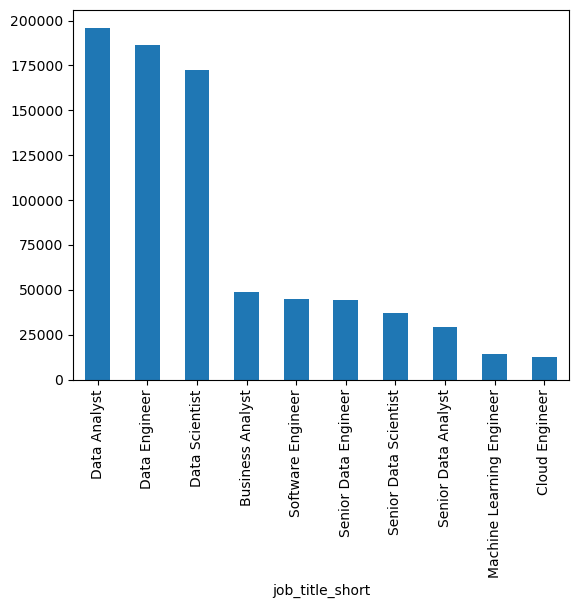

In [62]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind= 'bar', ax = ax)

In [63]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

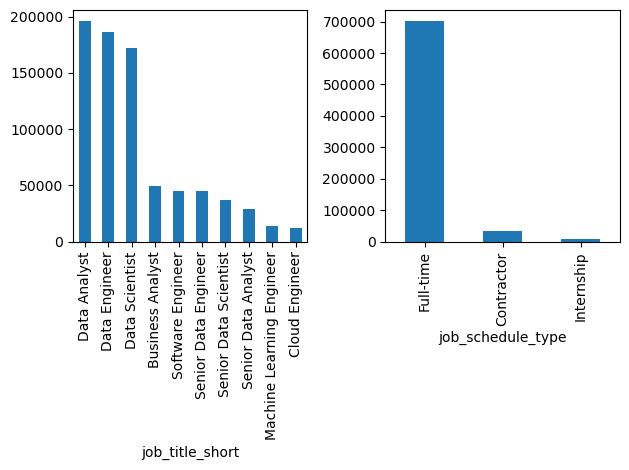

In [64]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2)

# Plot the first bar chart on the first subplot (ax[0])
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])

# Plot the second bar chart on the second subplot (ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
fig.tight_layout()
# Display the figure
plt.show()


In [65]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_counts = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = skill_counts.reset_index(name = 'skill_count')
df_skill_count.sort_values(by = 'skill_count', ascending= False, inplace=True)

df_skill_count


,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [101]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

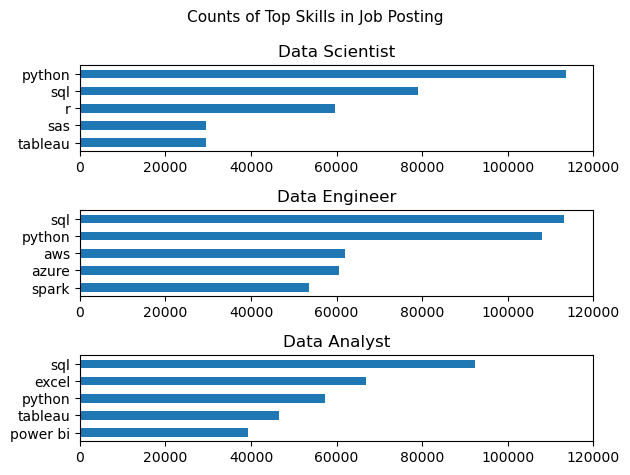

In [102]:
fig, ax = plt.subplots(3,1)

for i, job_titles in enumerate(job_titles):
    df_plot = (df_skill_count[df_skill_count['job_title_short'] == job_titles].head(5))
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title= job_titles)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Counts of Top Skills in Job Posting', fontsize = 11)
fig.tight_layout()


